# INTRO TO DATA VISUALIZATION WITH PYTHON (Task) - 2

# 1. Installing libraries & importing 'orders_products_customers_merged'

# 2. Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset

## 2.1. Creating a 'small_subset'

## 2.2. Creating a bar chart of orders per each day of week on 'small_subset'

## 2.3. Creating a scatter plot on distribution of “prices” against itself on 'small_subset'

### 2.3.1. Create an initial scatter plot on distribution of “prices” against itself on 'small_subset'

### 2.3.2. Remove outliers

### 2.3.3. Redo a scatter plot on distribution of “prices” against itself on 'small_subset'

## 2.4 Creating a histogram of the “prices” column on 'small_subset'

## 2.5. Creating line chart of “prices” and “orders_day_of_week" on 'small_subset'

# 3. Descriptive findings about sales

# 4. Showing distribution of orders among customers in terms of loyalty

# 5. Checking the difference in expenditure

# 6. Determining age/family situation connection

# 7. Exploring the age/spending power (income) connection

# 8. Exporting visualizations

In [1]:
# --------------------------------------------------

# 1. Installing libraries & importing 'orders_products_customers_merged'

In [2]:
    # Install libraries:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
    # Define the path:
    
path = r'/Users/elena/Documents/Data Analytics Course/4. Python fundamentals for Data Analysts/Instacart Basket Analysis'

In [4]:
    # Import 'orders_products_customers_merged.pkl':

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared data','orders_products_customers_merged.pkl'))

# 2. Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset

## 2.1. Creating a 'small_subset'

In [6]:
    # Set the “seed”:

np.random.seed(4)

In [7]:
    # Create a list 'dev' holding True or False based on whether it’s less than or equal to 0.7:

dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [8]:
    # Store 30% of 'ords_prods_cust' (dev) in sample 'small_subset':

small_subset = ords_prods_cust[~dev]

In [9]:
    # Store 70% of 'ords_prods_cust' (dev) in sample 'big_subset':

big_subset = ords_prods_cust[dev]

In [10]:
    # Check the results of the 70/30 split:

len(ords_prods_cust)

32404859

In [11]:
len(small_subset) + len(big_subset)

32404859

## 2.2. Creating a bar chart of orders per each day of week on 'small_subset'

<AxesSubplot:>

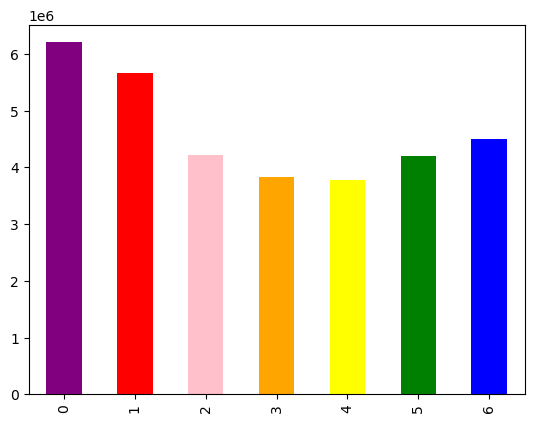

In [12]:
# Creating a bar chart of orders per each day of week on 'small_subset':
    
ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

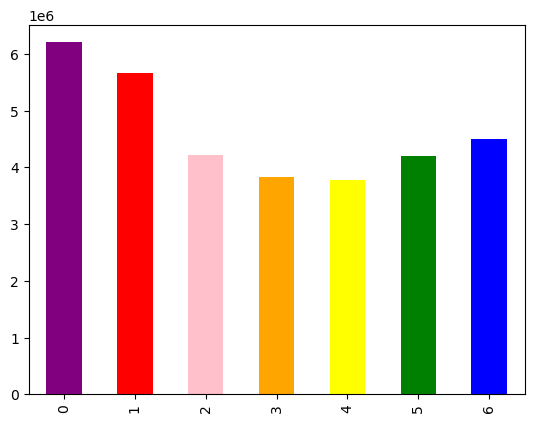

In [13]:
# Save bar chart within the 'bar_all' object:

bar_orders_day_of_week = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## 2.3. Creating a scatter plot on distribution of “prices” against itself on 'small_subset'

### 2.3.1. Create an initial scatter plot on distribution of “prices” against itself on 'small_subset'

<AxesSubplot:xlabel='prices', ylabel='prices'>

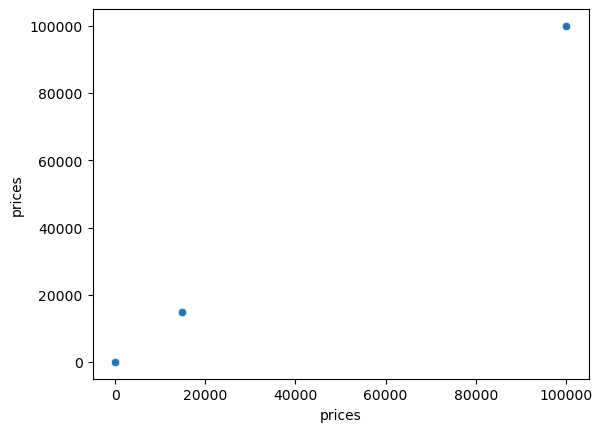

In [14]:
sns.scatterplot(x = 'prices', y = 'prices', data = small_subset)

In [15]:
    ## Remove the limit of number of columns to display:
    
pd.options.display.max_columns = None

### 2.3.2. Remove outliers

In [16]:
    # Mark the outliers of >100 in 'prices' as missing by turning them into NaNs:

small_subset.loc[small_subset['prices'] > 100, 'prices'] = np.nan

In [17]:
        # Check the replacement successfulness by running a max-value check on “prices” column:

small_subset['prices'].max()

25.0

### 2.3.3. Redo a scatter plot on distribution of “prices” against itself on 'small_subset'

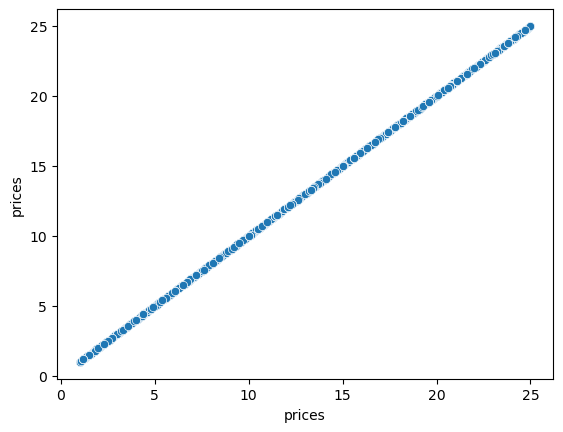

In [18]:
scatter_prices = sns.scatterplot(x = 'prices', y = 'prices', data = small_subset)

## 2.4 Creating a histogram of the “prices” column on 'small_subset'

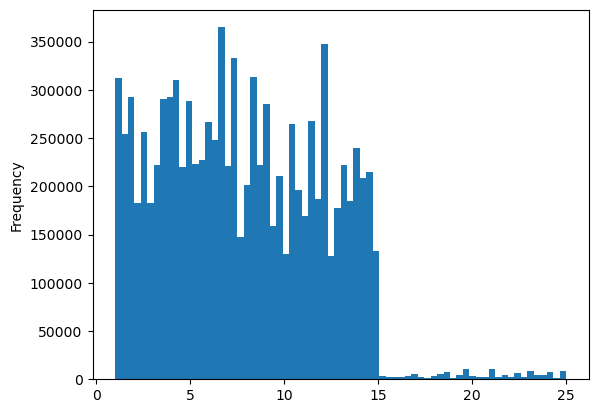

In [19]:
hist_prices = small_subset['prices'].plot.hist(bins = 70)

## 2.5. Creating line chart of “prices” and “orders_day_of_week" on 'small_subset'

In [21]:
# Reduce 'small_subset' sample to only contain “prices” and “orders_day_of_week" columns:

small_subset2 = small_subset[['prices', 'orders_day_of_week']]

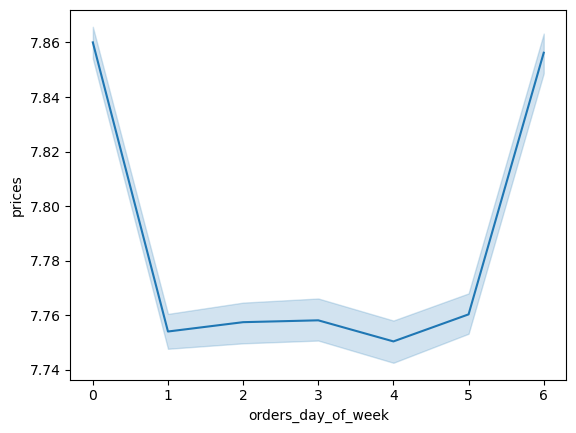

In [22]:
# Run the line chart:
    
line_orders_day_of_week_prices = sns.lineplot(data = small_subset2, x = 'orders_day_of_week', y = 'prices')

# 3. Descriptive findings about sales

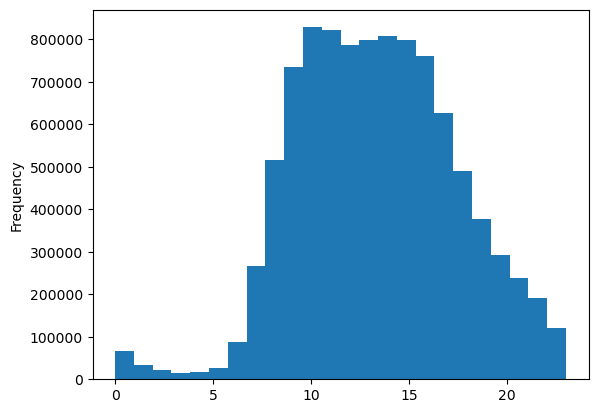

In [23]:
# Create a histogram of the “time_of_order, hour” column:

hist_time_of_order = small_subset['time_of_order, hour'].plot.hist(bins = 24)

#### - The histogram above shows us that most of the purchases happen between hour 9 and hour 16. Same histogram demonstrates hours between 1 and 7 as being the slowest in terms of numbers of orders.

# 4. Showing distribution of orders among customers in terms of loyalty

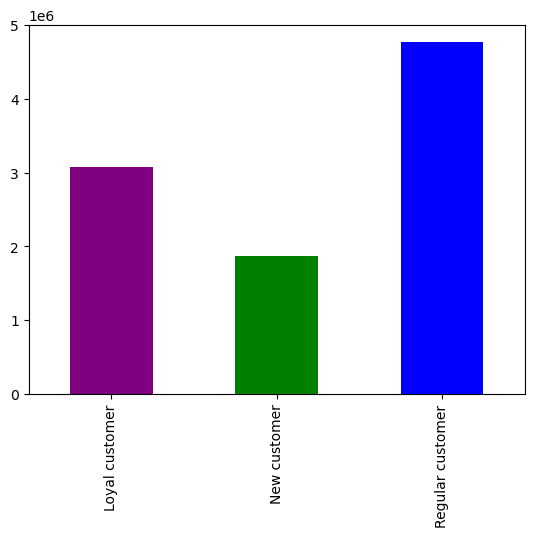

In [24]:
# Create a bar chart on “loyalty_flag”:

bar_loyalty_flag = small_subset['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['purple', 'green', 'blue'])

#### - The bar chart above shows the distribution of orders among different categories of customers, with regular cumsomers (who have between 10 and 40 orders with Instacart) leading in the overall amount of orders, followed by loyal customers. New customers showing the least amount of orders placed.

# 5. Checking the difference in expenditure

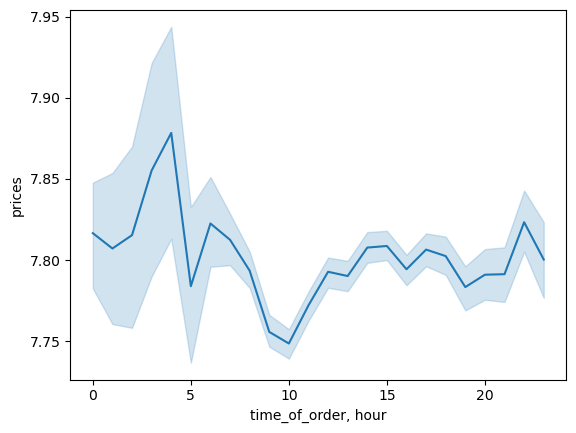

In [25]:
# Create a line chart of the “prices” column depending on the hour of the day:

line_time_of_order_hour_prices = sns.lineplot(data = small_subset, x = 'time_of_order, hour', y = 'prices')

#### - The line chart above demostrates that the highest peak for prices falls on hour 4, with hours 6 and 22 being the lower peaks. Hour 10 being the lowest in terms of the prices paid.

# 6. Determining age/family situation connection

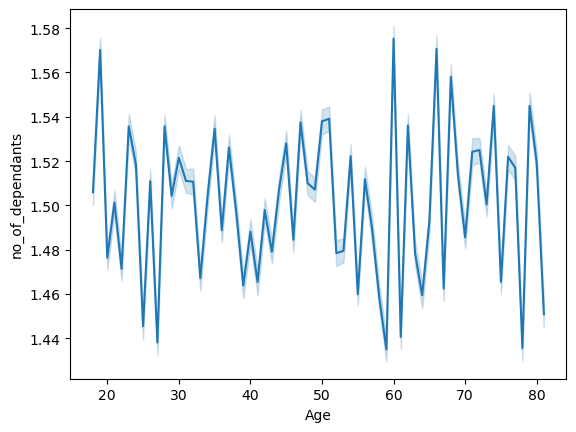

In [26]:
# Create a line chart on age and number of dependents:

line_Age_no_of_dependants = sns.lineplot(data = small_subset, x = 'Age', y = 'no_of_dependants')

#### - The line chart above shows very little connection between the age and number of dependants. With milder fluctuation around the 30 to 50 age group. In general, the upper and lower peaks are quite close to each other (1.44 - 1.57), and do not provide much useful input.

# 7. Exploring the age/spending power (income) connection

In [ ]:
# Create a scatterplot of 'Age' and 'income':

scatter_Age_income = sns.scatterplot(x = 'Age', y = 'income', data = small_subset)

#### - The scatterplot above very vividly shows us the age line beyond which the income jumps up and it is the age of 40, at which the majority of Instacart customers transition from 200K to 300K income. The income ceiling also jumps up from 400K to 600K at the same age line of 40.

# 8. Exporting visualizations

In [29]:
    # Export BAR CHART of orders per each day of week on 'small_subset':

In [30]:
bar_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

In [31]:
    # Export SCATTER PLOT on distribution of “prices” against itself on 'small_subset':

In [32]:
scatter_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [33]:
    # Export HISTOGRAM of the “prices” column on 'small_subset':

In [34]:
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [35]:
    # Export LINECHART of “prices” and “orders_day_of_week" on 'small_subset':

In [36]:
line_orders_day_of_week_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_day_of_week_prices.png'))

In [37]:
    # Export HISTOGRAM of the “time_of_order, hour” column:

In [38]:
hist_time_of_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_time_of_order.png'))

In [39]:
    # Export BARCHART of distribution of orders among customers in terms of loyalty:

In [40]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [41]:
    # Export LINECHART of difference in expenditure (the “prices” column) depending on the hour of the day:

In [42]:
line_time_of_order_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_time_of_order_hour_prices.png'))

In [43]:
    # Export LINECHART on age/family situation (number of dependents):

In [44]:
line_Age_no_of_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_Age_no_of_dependants.png'))

In [45]:
    # Export LINECHART on the age/spending power (income) connection:

In [46]:
scatter_Age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_Age_income.png'))